# 🫀 Predicting Heart Disease Using Machine Learning..

This notebook looks into using various python-based machine learning and data science libraries in anattempt to build machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Feaures
5. Modeling
6. Experimentation

## 1. Problem Definition
In a statement ,
>Give clinical parameters about a patient, can we predict whether or not they have heart disease?
>
## 2. Data

The original data came from the Cleavland data from the UCI Machine Learning  Repository.
https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle.
https://www.kaggle.com/ronitf/heart-disease-uci

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient hs heart disease during the proof of concept , we'll pursue the project.
>
## 4. Features

This is where you'll get different information about each of the features in your data.

**Create data dictionary**

1. `age` - age in years
 
2. `sex` - (1 = male; 0 = female)
3. `cp` - chest pain type
>* 0: Typical angina: chest pain related decrease blood supply to the heart
>* 1: Atypical angina: chest pain not related to heart
>* 2: Non-anginal pain: typically esophageal spasms (non heart related)
>* 3: Asymptomatic: chest pain not showing signs of disease

4. `trestbps` - resting blood pressure (in mm Hg on admission to the hospital) anything       above 130-140 is typically cause for concern

5. `chol` - serum cholestoral in mg/dl
>* serum = LDL + HDL + .2 * triglycerides
>* above 200 is cause for concern

6. `fbs` - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
>* '>126' mg/dL signals diabetes

7. `restecg` - resting electrocardiographic results
>* 0: Nothing to note
>* 1: ST-T Wave abnormality can range from mild symptoms to severe problems signals non-normal heart beat
>* 2: Possible or definite left ventricular hypertrophy
Enlarged heart's main pumping chamber

8. `thalach` - maximum heart rate achieved
9. `exang` - exercise induced angina (1 = yes; 0 = no)
10. `oldpeak` - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more

11. `slope` - the slope of the peak exercise ST segment
>* 0: Upsloping: better heart rate with excercise (uncommon)
>* 1: Flatsloping: minimal change (typical healthy heart)
>* 2: Downslopins: signs of unhealthy heart

12. `ca` - number of major vessels (0-3) colored by flourosopy
>* colored vessel means the doctor can see the blood passing through
>* the more blood movement the better (no clots)

13. `thal` - thalium stress result
>* 1,3: normal
>* 6: fixed defect: used to be defect but ok now
>* 7: reversable defect: no proper blood movement when excercising

14. `target` - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Preparing the tools
we're going to use pandas, Matplotlib and Numpy for data analysis and manipulation.

In [1]:
# importing all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# we want our plots to appear inside the notebook
%matplotlib inline 

# Mmodels from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

## Load Data

In [2]:
df = pd.read_csv('heart-disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape # (rows, columns)

(303, 14)

## Data Exploration (exploratory data analysis or EDA)
The goal here is to find out more about the data and become a subject matter export on the dataset you're working with.

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
# Let's find out how many of each class there
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

#### Graph of Target Column

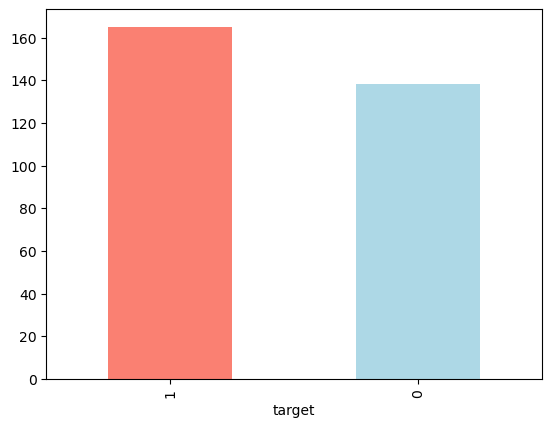

In [7]:
# Plot the value counts with a bar graph
df.target.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);
plt.show()

#### info()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


#### Missing Values

In [9]:
# Are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
# There is no missing value

In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Disease frequancy according to Sex

In [12]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

#### Comparing target column with sex column

In [13]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


*From the Target column Dataframe:*

Since there are about 100 women and 72 of them have a positive value of heart disease being present, we might infer, based on this one variable if the participant is a woman, there's a ~72% (72/96 women in our dataset are positive for heart disease) chance she has heart disease.

As for males, there's about 200 total with around half (93/207) indicating a presence of heart disease.

So we might predict, if the participant is male, 50% of the time he will have heart disease.

Averaging these two values, we can assume, based on no other parameters, if there's a person, there's a 62.5% chance they have heart disease.

This can be our very simple `baseline`, we'll try to beat it with machine learning.

**Note:** A baseline is a simple model or estimate you start with and try to beat/confirm throughout your experiments. It can be as simple as looking at the data as we've done and creating a predictive heuristic to move forward.

## 4.2 Making our comparison visual

We can plot our pd.crosstab comparison by calling the plot() method and passing it a few parameters:

* `kind`- The type of plot you want (e.g. "bar" for a bar plot).
* `figsize`=(length, width) - How big you want it to be.
* `color`=[colour_1, colour_2] - The different colours you'd like to use.
Different metrics are represented best with different kinds of plots.

In our case, a bar graph is great. We'll see examples of more later. And with a bit of practice, you'll gain an intuition of which plot to use with different variables.

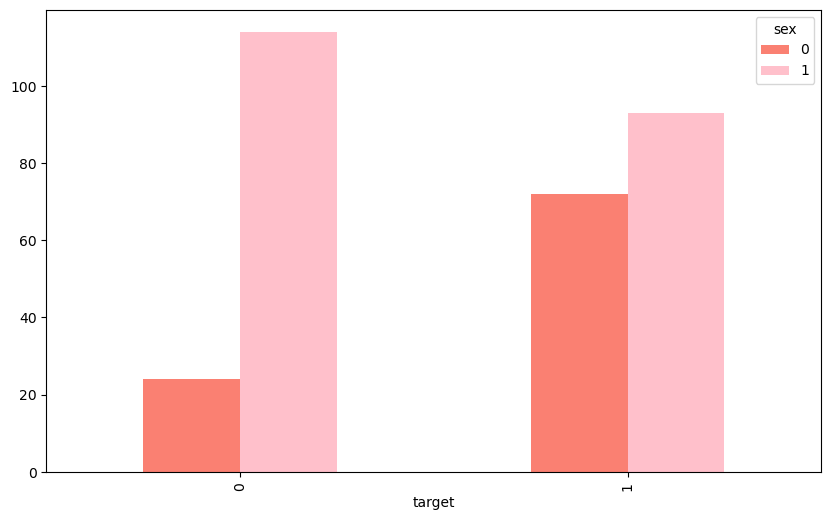

In [14]:
# create a plot
pd.crosstab(df.target, df.sex).plot(kind='bar',
                                   figsize=(10,6),
                                   color=['salmon', 'pink']);
plt.show();

Nice! But our plot is looking pretty bare. Let's add some attributes.

We'll create the plot again with `pd.crosstab()` and the `plot()`method.

Then, since our plot is built with `matplotlib`, we can add some helpful labels to it with `plt.title()`, `plt.xlabel()`, `plt.legend()` and more.

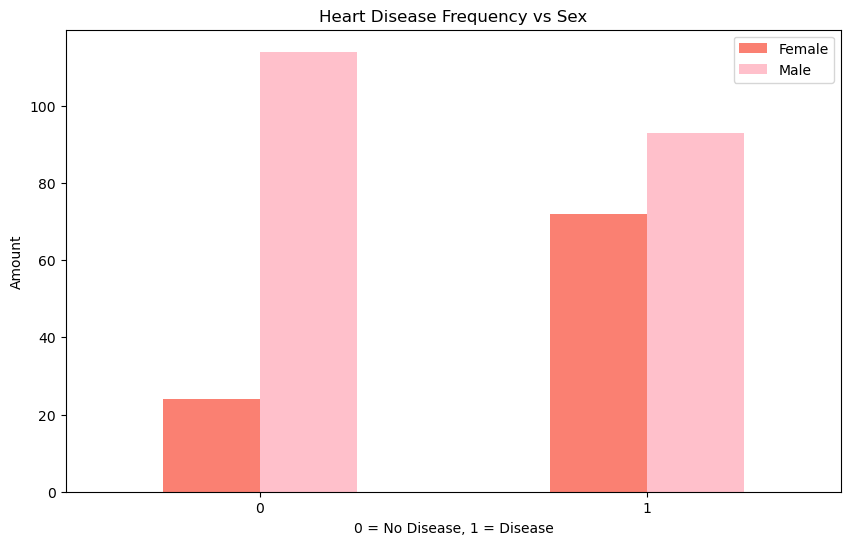

In [15]:
# Create a plot
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10,6), color=["salmon", "pink"])

# Add some attributes to it
plt.title("Heart Disease Frequency vs Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0); # keep the labels on the x-axis vertical
plt.show();

## 4.3 Comparing age and maximum heart rate
Let's try combining a couple of independent variables, such as, `age` and `thalach` (maximum heart rate) and then comparing them to our target variable `heart disease`.

Because there are so many different values for `age` and `thalach`, we'll use a scatter plot.

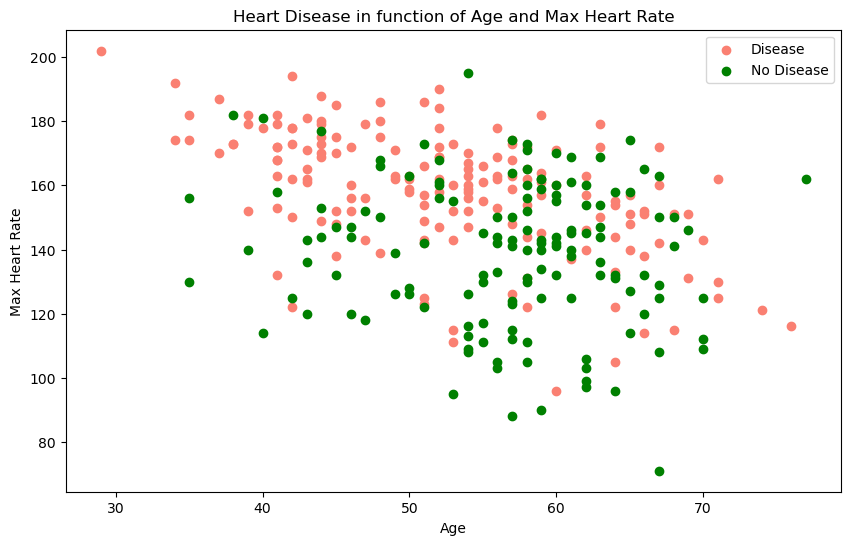

In [16]:
# Create another figure
plt.figure(figsize=(10,6))

# Start with positve examples
plt.scatter(df.age[df.target==1], 
            df.thalach[df.target==1], 
            c="salmon") # define it as a scatter figure

# Now for negative examples, we want them on the same plot, so we call plt again
plt.scatter(df.age[df.target==0], 
            df.thalach[df.target==0], 
            c='green') # axis always come as (x, y)

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate");
plt.show();


It seems the younger someone is, the higher their max heart rate (dots are higher on the left of the graph) and it seems there may be more heart disease in the younger population too (more orange dots).

Both of these are observational of course, but this is what we're trying to do, build an understanding of the data.

Let's check the age **distribution**.

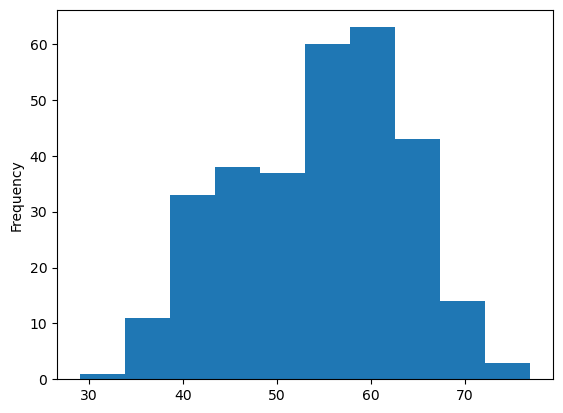

In [17]:
# Histograms are a great way to check the distribution of a variable
df.age.plot.hist();
plt.show()

## 4.4 Comparing heart disease frequency and chest pain type
Let's try comparing another independent variable with our target variable.

This time, we'll use cp (chest pain) as the independent variable.

We'll use the same process as we did before with sex

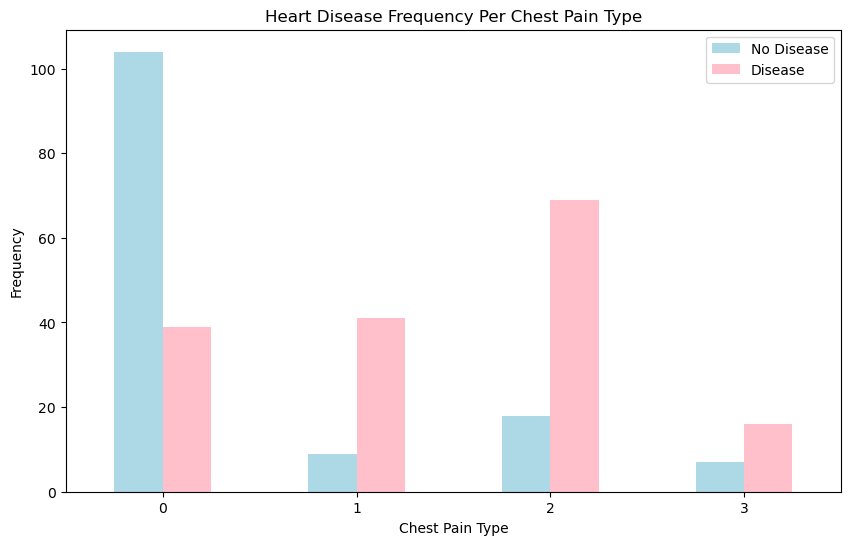

In [18]:
# Create a new crosstab and base plot
pd.crosstab(df.cp, df.target).plot(kind="bar", 
                                   figsize=(10,6), 
                                   color=["lightblue", "pink"])

# Add attributes to the plot to make it more readable
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0);
plt.show();

Remember from our data dictionary what the different levels of chest pain are.

| Feature  | Description | Example Values |
|:-----|:-----|:------|
| **cp**  | Chest pain type | 0: Typical angina (chest pain), 1: Atypical angina (chest pain not related to heart), 2: Non-anginal pain (typically esophageal spasms (non heart related), 3: Asymptomatic (chest pain not showing signs of disease) |
    
It's interesting that atypical angina (value 1) states it's not related to the heart but seems to have a higher ratio of participants with heart disease than not.

**What does atypical agina even mean?**

At this point, it's important to remember, if your data dictionary doesn't supply you enough information, you may want to do further research on your values.

This research may come in the form of asking a subject matter expert (such as a cardiologist or the person who gave you the data) or Googling to find out more.

## 4.5 Correlation between independent variables

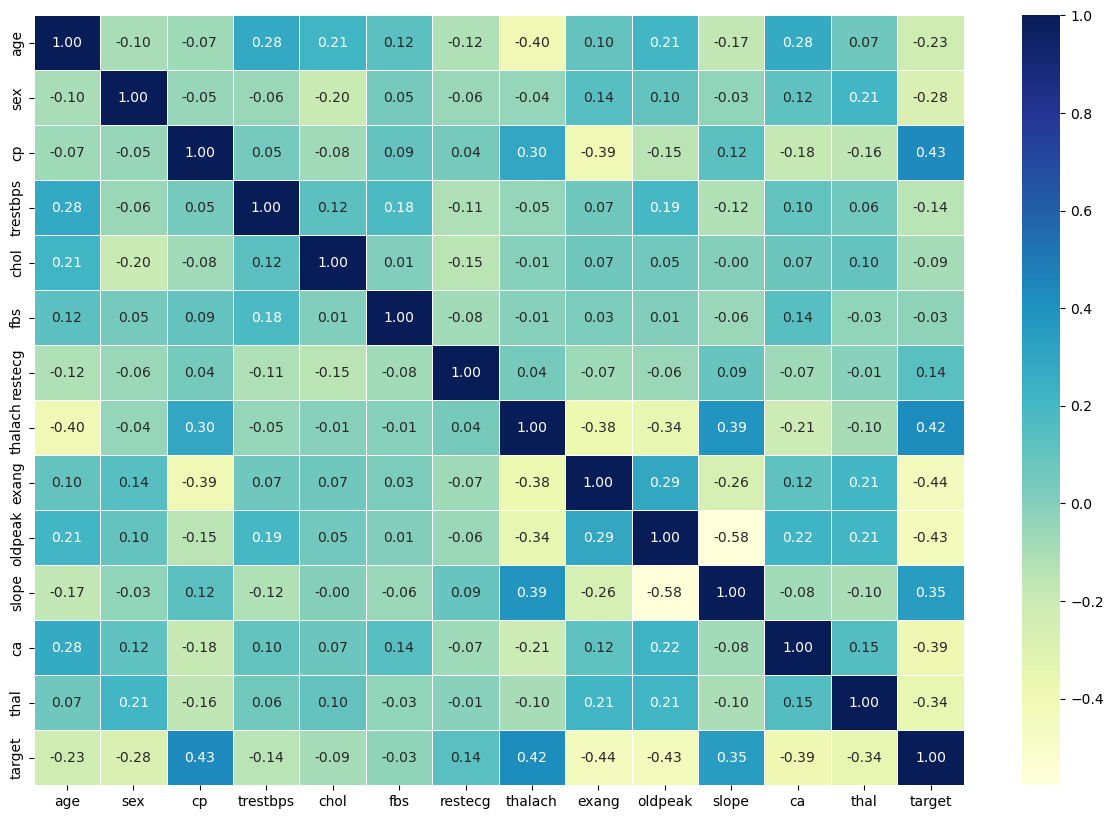

In [19]:
# Let's make it look a little prettier
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");
plt.show();

## 5. Modeling
We've explored the data, now we'll try to build a machine learning model to be able to predict our target variable based on the 13 independent variables.

Remember our problem?

>Given clinical parameters about a patient, can we predict whether or not they have heart disease?

That's what we'll be trying to answer.

And remember our evaluation metric?

>If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursure this project.

That's what we'll be aiming for.

But before we build a model, we have to get our dataset ready.



In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


We're trying to predict our target variable using all of the other variables.

To do this, we'll split the target variable from the rest.

We can do this by creating:

`X` - Our features (all variables except the target column) 

`y` - Our target variable using df.target.to_numpy() (this will extract the target column as a NumPy array).

In [21]:
X = df.drop(labels="target", axis=1)

# Target variable
y = df.target.to_numpy()

In [22]:
# Independent variables (no target column)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


## Splitting our Data in Training AND Testing Set

* **Training set (often 70-80% of total data)** - Model learns patterns on this dataset to hopefully be able to predict on similar but unseen samples.
* **Testing set (often 20-30% of total data)** - Trained model gets evaluated on these unseen samples to see how the patterns learned from the training set may perform on future unseen samples (e.g. when used in an application or production setting). However, performance on the test set is not guaranteed in the real world.

**Why not use all the data to train a model?**

Let's say you wanted to take your model into the hospital and start using it on patients.

How would you know how well your model goes on a new patient not included in the original full dataset you had?

This is where the test set comes in.

It's used to mimic taking your model to a real environment as much as possible.

And it's why it's important to never let your model learn from the test set, it should only be evaluated on it.

To split our data into a training and test set, we can use Scikit-Learn's `sklearn.model_selection.train_test_split()` and feed it our independent and dependent variables (X & y).

In [23]:
# Random seed for reproducibility (since train_test_split is random by default, setting the seed will create reproducible splits)
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, # independent variables 
                                                    y, # dependent variable
                                                    test_size = 0.2) # percentage of data to use for test set

In [24]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3


In [25]:
y_train

array([1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1])

In [26]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [27]:
y_test

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

## 5.2 Choosing a model
We'll start by trying the following models and comparing their results.

* Logistic Regression - `sklearn.linear_model.LogisticRegression()`
* K-Nearest Neighbors - `sklearn.neighbors.KNeighboursClassifier()`
* RandomForest - `sklearn.ensemble.RandomForestClassifier()`

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [29]:
lrc = LogisticRegression(solver = 'liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [30]:
# ek dictionary bnaai jiske keys m model names the or values m object

clfs = {
    'DecisionTreeClassifier' : dtc,
    'LogisticRegression' : lrc,
    'KNeighborsClassifier' : knc,
    'RandomForestClassifier' : rfc,
    'XGBClassifier' : xgb
}

In [31]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    return accuracy, precision

In [32]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)

    print('For ',name)
    print('Accuracy = ',current_accuracy)
    print('Precision = ',current_precision)
    print(' ')
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  DecisionTreeClassifier
Accuracy =  0.8032786885245902
Precision =  0.8125
 
For  LogisticRegression
Accuracy =  0.8688524590163934
Precision =  0.875
 
For  KNeighborsClassifier
Accuracy =  0.6885245901639344
Precision =  0.6857142857142857
 
For  RandomForestClassifier
Accuracy =  0.8688524590163934
Precision =  0.8529411764705882
 
For  XGBClassifier
Accuracy =  0.8032786885245902
Precision =  0.8571428571428571
 


In [33]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),"Accuracy":accuracy_scores, 'Precision':precision_scores}).sort_values('Accuracy', ascending=False)

In [34]:
performance_df

,Algorithm,Accuracy,Precision
1,LogisticRegression,0.868852,0.875000
3,RandomForestClassifier,0.868852,0.852941
0,DecisionTreeClassifier,0.803279,0.812500
4,XGBClassifier,0.803279,0.857143
2,KNeighborsClassifier,0.688525,0.685714


## 5.3 Comparing the results of several models
Since we've saved our models scores to a dictionary, we can plot them by first converting them to a DataFrame.

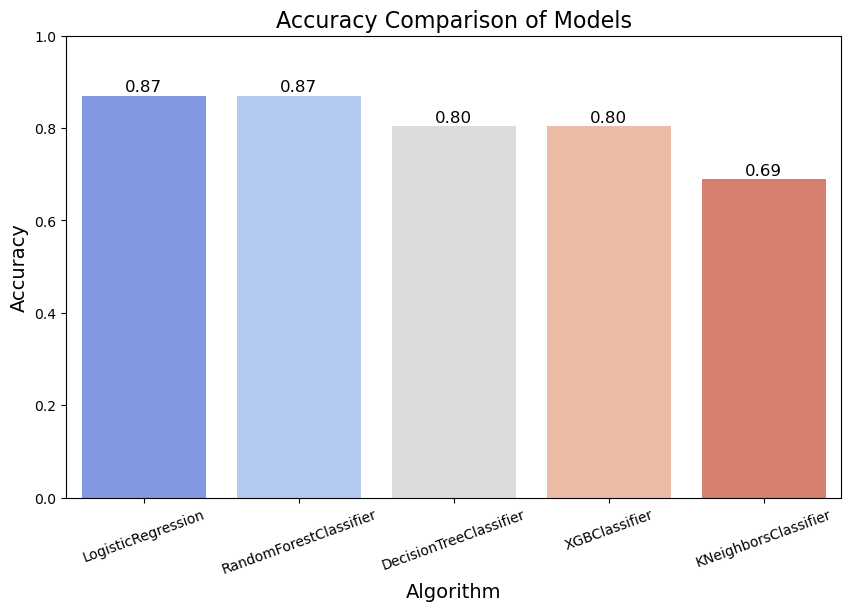

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(10,6))

# Bar plot for Accuracy
sns.barplot(x='Algorithm', y='Accuracy', data=performance_df, palette='coolwarm')

# Add title and labels
plt.title('Accuracy Comparison of Models', fontsize=16)
plt.xlabel('Algorithm', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.xticks(rotation=20)
plt.ylim(0, 1)

# Display accuracy values on top of bars
for index, value in enumerate(performance_df['Accuracy']):
    plt.text(index, value + 0.01, f"{value:.2f}", ha='center', fontsize=12)

# Show plot
plt.show()

From this plot look like RandomForestClassifier & LogisticRegression models perform very well

## 6. Hyperparameter tuning and cross-validation
Let's briefly go through each before we see them in action.

| **Term** | **Definition** |
| :----- | :----- |
| **Hyperparameter tuning** | Many machine learning models have a series of settings/dials you can turn to dictate how they perform. Changing these values may increase or decrease model performance. The practice of figuring out the best settings for a model is called hyperparameter tuning. |
| **Feature importance** | If there are a large amount of features we're using to make predictions, do some have more importance than others? For example, for predicting heart disease, which is more important, sex or age? |
| [**Confusion matrix**](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/) | Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagnol line). | 
| [**Cross-validation**](https://scikit-learn.org/stable/modules/cross_validation.html) | Splits your dataset into multiple versions of training and test sets and trains/evaluations your model on each different version. This ensures that your evaluation metrics are across several different splits of data rather than a single split (if it was only a single split, you might get lucky and get better than usual results, the same for the reverse, if you get a poor split, you might find your metrics lower than they should be). | 
| [**Precision**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score) | A common classification evaluation metric. Measures the proportion of true positives over total number of samples. Higher precision leads to fewer false positives. |  
[**Recall**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score) | A common classification evaluation metric. Measures the proportion of true positives over total number of true positives and false negatives. Higher recall leads to fewer false negatives. |
| [**F1 score**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score) | Combines precision and recall into one metric. 1 is best, 0 is worst. |
| [**Classification report**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) | Sklearn has a built-in function called `classification_report()` which returns some of the main classification metrics such as precision, recall and f1-score. |
| [**ROC Curve**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) | [Receiver Operating Characterisitc](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) is a plot of true positive rate versus false positive rate. A perfect curve will follow the left and top border of a plot. | 
| [**Area Under Curve (AUC)**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html) | The area underneath the ROC curve. A perfect model achieves a score of 1.0. |

In [51]:
# Create a list of train scores
train_scores = []

# Create a list of test scores
test_scores = []

# Create a list of different values for n_neighbors
RandomForest = range(1, 21) # 1 to 20

# Setup algorithm
rfc = RandomForestClassifier()

# Loop through different neighbors values
for i in RandomForest:
    rfc.set_params(n_estimators = i) # set estimators value
    
    # Fit the algorithm
    rfc.fit(X_train, y_train)
    
    # Update the training scores
    train_scores.append(rfc.score(X_train, y_train))
    
    # Update the test scores
    test_scores.append(rfc.score(X_test, y_test))

In [38]:
train_scores

[0.9297520661157025,
 0.8966942148760331,
 0.9586776859504132,
 0.9669421487603306,
 0.9628099173553719,
 0.9752066115702479,
 0.9917355371900827,
 0.987603305785124,
 0.9958677685950413,
 0.9917355371900827,
 1.0,
 0.9958677685950413,
 0.9958677685950413,
 0.9917355371900827,
 0.9958677685950413,
 0.9958677685950413,
 0.9958677685950413,
 1.0,
 1.0,
 1.0]

In [39]:
test_scores

[0.7540983606557377,
 0.7868852459016393,
 0.819672131147541,
 0.819672131147541,
 0.819672131147541,
 0.8032786885245902,
 0.9016393442622951,
 0.819672131147541,
 0.819672131147541,
 0.8852459016393442,
 0.8524590163934426,
 0.8032786885245902,
 0.8360655737704918,
 0.8360655737704918,
 0.819672131147541,
 0.819672131147541,
 0.819672131147541,
 0.8688524590163934,
 0.8524590163934426,
 0.8032786885245902]

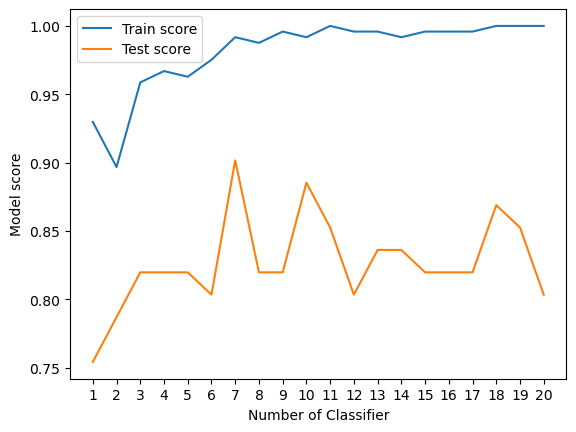

Maximum KNN score on the test data: 90.16%


In [40]:
plt.plot(RandomForest, train_scores, label="Train score")
plt.plot(RandomForest, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1));
plt.xlabel("Number of Classifier");
plt.ylabel("Model score")
plt.legend()
plt.show()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

## 6.2 Tuning models with with RandomizedSearchCV
Reading the Scikit-Learn documentation for `LogisticRegression`, we find there's a number of different hyperparameters we can tune.

The same for `RandomForestClassifier`.

Let's create a hyperparameter grid (a dictionary of different hyperparameters) for each and then test them out.

In [41]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [42]:
%%time

# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model
rs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits
CPU times: total: 578 ms
Wall time: 648 ms


In [43]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(0.23357214690901212)}

In [44]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

Nice! That seems on par with the result we got before without any hyperparameter tuning.

In [45]:
%%time 

# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits
CPU times: total: 1min 20s
Wall time: 1min 22s


In [46]:
# Find the best parameters
rs_rf.best_params_

{'n_estimators': np.int64(210),
 'min_samples_split': np.int64(4),
 'min_samples_leaf': np.int64(19),
 'max_depth': 3}

In [47]:
# Evaluate the randomized search random forest model
rs_rf.score(X_test, y_test)

0.8688524590163934

## 6.3 Tuning a model with GridSearchCV
The difference between RandomizedSearchCV and GridSearchCV is:

* `sklearn.model_selection.RandomizedSearchCV` searches over a grid of hyperparameters performing n_iter combinations (e.g. will explore random combinations of the
hyperparameters for a defined number of iterations).`
* `sklearn.model_selection.GridSearchCV` will test every single possible combination of hyperparameters in the grid (this is a thorough test but can take quite a long time).

In [48]:
%%time

# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits
CPU times: total: 578 ms
Wall time: 581 ms


In [49]:
# Check the best parameters
gs_log_reg.best_params_

{'C': np.float64(0.23357214690901212), 'solver': 'liblinear'}

In [50]:
# Evaluate the model
gs_log_reg.score(X_test, y_test)

0.8852459016393442

n this case, we get the same results as before since our grid only has a maximum of 20 different hyperparameter combinations.

## 7. Evaluating a classification model, beyond accuracy

Now we've got a tuned model, let's get some of the metrics we discussed before.

We want:

| Metric/Evaluation Technique | Scikit-Learn method/documentation |
| ----- | ----- |
| ROC curve and AUC score | [`sklearn.metrics.RocCurveDisplay()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html), **Note:** This was previously `sklearn.metrics.plot_roc_curve()`, as of Scikit-Learn version 1.2+, it is `sklearn.metrics.RocCurveDisplay()`. |
| Confusion matrix | [`sklearn.metrics.confusion_matrix()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) |
| Classification report | [`sklearn.metrics.classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) |
| Precision | [`sklearn.metrics.precision_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html) |
| Recall | [`sklearn.metrics.recall_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html) |
| F1-score | [`sklearn.metrics.f1_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) | 


In [53]:
# Make preidctions on test data
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

### 7.1 ROC Curve and AUC Scores

What's a ROC curve?

It's a way of understanding how your model is performing by comparing the true positive rate to the false positive rate.

In our case...

> To get an appropriate example in a real-world problem, consider a diagnostic test that seeks to determine whether a person has a certain disease. A false positive in this case occurs when the person tests positive, but does not actually have the disease. A false negative, on the other hand, occurs when the person tests negative, suggesting they are healthy, when they actually do have the disease.

Scikit-Learn implements a function `RocCurveDisplay` (previously called `plot_roc_curve` in Scikit-Learn versions < 1.2) which can help us create a ROC curve as well as calculate the area under the curve (AUC) metric.

Reading the documentation on the [`RocCurveDisplay`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html) function we can see it has a class method called [`from_estimator(estimator, X, y)`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html#sklearn.metrics.RocCurveDisplay.from_estimator) as inputs. 

Where `estimator` is a fitted machine learning model and `X` and `y` are the data you'd like to test it on.

In our case, we'll use the GridSearchCV version of our `LogisticRegression` estimator, `gs_log_reg` as well as the test data, `X_test` and `y_test`.

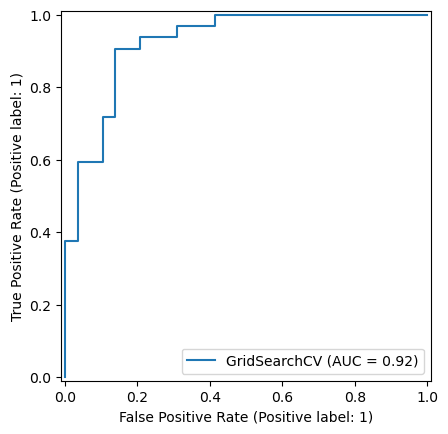

In [56]:
# Before Scikit-Learn 1.2.0 (will error with versions 1.2+)
# from sklearn.metrics import plot_roc_curve 
# plot_roc_curve(gs_log_reg, X_test, y_test);

# Scikit-Learn 1.2.0 or later
from sklearn.metrics import RocCurveDisplay 

# from_estimator() = use a model to plot ROC curve on data
RocCurveDisplay.from_estimator(estimator=gs_log_reg, 
                               X=X_test, 
                               y=y_test); 
plt.show();

This is great, our model does far better than guessing which would be a line going from the bottom left corner to the top right corner, AUC = 0.9. 

Let's move on to the next evaluation request, a confusion matrix.

### 7.2 Creating a confusion matrix 

A confusion matrix is a visual way to show where your model made the right predictions and where it made the wrong predictions (or in other words, got confused).

Scikit-Learn allows us to create a confusion matrix using [`sklearn.metrics.confusion_matrix()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) and passing it the true labels and predicted labels.

In [57]:
# Display confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


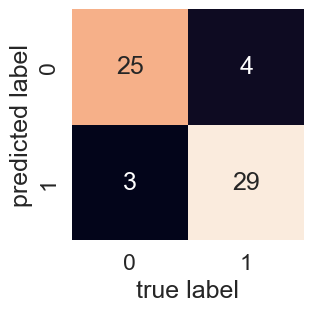

In [60]:
# Import Seaborn
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False);
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    plt.show();
plot_conf_mat(y_test, y_preds)

### 7.3 Classification report

In [61]:
# Show classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [62]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': np.float64(0.23357214690901212), 'solver': 'liblinear'}

In [63]:
# Import cross_val_score
from sklearn.model_selection import cross_val_score

# Instantiate best model with best hyperparameters (found with GridSearchCV)
clf = LogisticRegression(C=0.23357214690901212,
                         solver="liblinear")

In [64]:
%%time

# Cross-validated accuracy score
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation, this is the default
                         scoring="accuracy") # accuracy as scoring
cv_acc

CPU times: total: 31.2 ms
Wall time: 34.4 ms


array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

Woah!

The output from `cross_val_score()` shows 5 different metrics across different splits of the data.

This goes to show the power of cross-validation.

If we had have only chosen to go with the results of one data split, we might be thinking our model is under performing or over performing.

Since there are 5 metrics here, we'll take the average.

In [65]:
cv_acc = np.mean(cv_acc)
cv_acc

np.float64(0.8479781420765027)

#### Cross-validated-score()

In [66]:
# Cross-validated precision score
cv_precision = np.mean(cross_val_score(clf,
                                       X,
                                       y,
                                       cv=5, # 5-fold cross-validation
                                       scoring="precision")) # precision as scoring
cv_precision

np.float64(0.8215873015873015)

#### Recall Score()

In [67]:
# Cross-validated recall score
cv_recall = np.mean(cross_val_score(clf,
                                    X,
                                    y,
                                    cv=5, # 5-fold cross-validation
                                    scoring="recall")) # recall as scoring
cv_recall

np.float64(0.9272727272727274)

#### F1_Score()

In [68]:
# Cross-validated F1 score
cv_f1 = np.mean(cross_val_score(clf,
                                X,
                                y,
                                cv=5, # 5-fold cross-validation
                                scoring="f1")) # f1 as scoring
cv_f1

np.float64(0.8705403543192143)

#### Let's visualize them

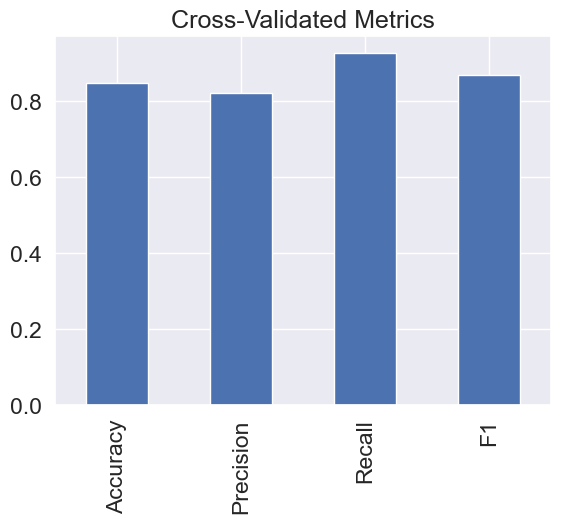

In [71]:
# Visualizing cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);
plt.show();

## 8. Feature importance

Feature importance is another way of asking, "Which features contribute most to the outcomes of the model?"

For our problem, trying to predict heart disease using a patient's medical characteristics, getting the feature importance is like asking "Which characteristics contribute most to a model predicting whether someone has heart disease or not?"

Because how each model finds patterns in data is slightly different, how a model judges how important those patterns are is different as well. 

This means for each model, there's a slightly different way of finding which features were most important and in turn, the feature importance of one model won't necessarily reflect the feature importance of another.

You can usually find an example via the Scikit-Learn documentation or via searching for something like "MODEL TYPE feature importance", such as, "random forest feature importance".

Since we're using `LogisticRegression`, we'll look at one way we can calculate feature importance for it.

To do so, we'll use the `coef_` attribute. Looking at the [Scikit-Learn documentation for `LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), the `coef_` attribute is the coefficient of the features in the decision function.

We can access the `coef_` attribute after we've fit an instance of `LogisticRegression`.

In [72]:
# Fit an instance of LogisticRegression (taken from above)
clf.fit(X_train, y_train);

In [73]:
# Check coef_
clf.coef_

array([[ 0.00369922, -0.9042409 ,  0.67472826, -0.0116134 , -0.00170364,
         0.04787688,  0.33490198,  0.02472938, -0.63120406, -0.5759095 ,
         0.47095141, -0.65165348, -0.69984208]])

In [74]:
# Match features to columns
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'age': np.float64(0.0036992207735222936),
 'sex': np.float64(-0.9042409027676933),
 'cp': np.float64(0.6747282591013247),
 'trestbps': np.float64(-0.011613401311995881),
 'chol': np.float64(-0.001703643974904055),
 'fbs': np.float64(0.04787688089306608),
 'restecg': np.float64(0.3349019821325941),
 'thalach': np.float64(0.024729382907772574),
 'exang': np.float64(-0.6312040609811942),
 'oldpeak': np.float64(-0.5759095019287949),
 'slope': np.float64(0.4709514064291035),
 'ca': np.float64(-0.6516534774104941),
 'thal': np.float64(-0.6998420760932893)}

In [94]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
feature_df = features_df.T.reset_index()
feature_df.columns = ['Feature', 'Importance']
feature_df

,Feature,Importance
0,age,0.003699
1,sex,-0.904241
2,cp,0.674728
3,trestbps,-0.011613
4,chol,-0.001704
5,fbs,0.047877
6,restecg,0.334902
7,thalach,0.024729
8,exang,-0.631204
9,oldpeak,-0.575910


Haha,

From vertical to horizontal, but it looks better

#### Let's Visualize using **Bar Graph**

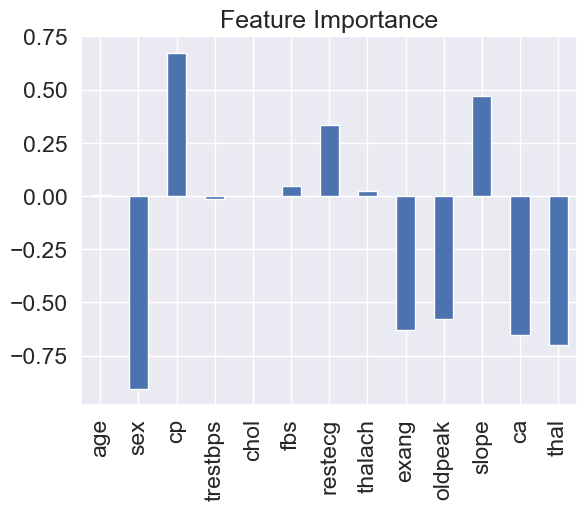

In [100]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);
plt.show();

In [101]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [102]:
# Contrast slope (positive coefficient) with target
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


We try'd with some of classification models now lets try with  
**CatBoostClassifier**

`Why CatBoost?`

* CatBoost automatically handles categorical features (though in our dataset, most are numeric).

* It performs well without extensive data preprocessing.

* It reduces overfitting using ordered boosting.

* Works well with imbalanced datasets when class weights are provided.

* Often gives higher AUC (Area Under Curve) and Recall, which are very important for medical predictions.


> Key Focus:
In healthcare, Recall and AUC are more critical than raw accuracy because missing a positive case (False Negative) can be dangerous.

In [122]:
# !pip install catboost

In [125]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, classification_report

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize CatBoost
cat_model = CatBoostClassifier(iterations=200, 
                               learning_rate=0.01, 
                               depth=6,
                               class_weights= [1, 3],
                               verbose=0)

# Train
cat_model.fit(X_train, y_train);



### Model Evaluation

We evaluated the model using:

Accuracy → Overall correctness of predictions

Precision → How many predicted positives are actually correct

Recall (Sensitivity) → How many actual positives are correctly identified

AUC (ROC Area) → Overall performance across different thresholds

In [126]:
# Predict
y_pred = cat_model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8852459016393442
Precision: 0.8571428571428571
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.83      0.87        29
           1       0.86      0.94      0.90        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



### Interpretation

**Recall (94%)** is excellent → The model successfully identifies most patients with heart disease.

**AUC (90%)** shows the model is highly capable of distinguishing between positive and negative cases.

Accuracy is good at 88.5%, meaning the model performs well overall.

Slight trade-off between precision and recall, but recall is prioritized for medical applications.

In [ ]:
This model is also worked good and

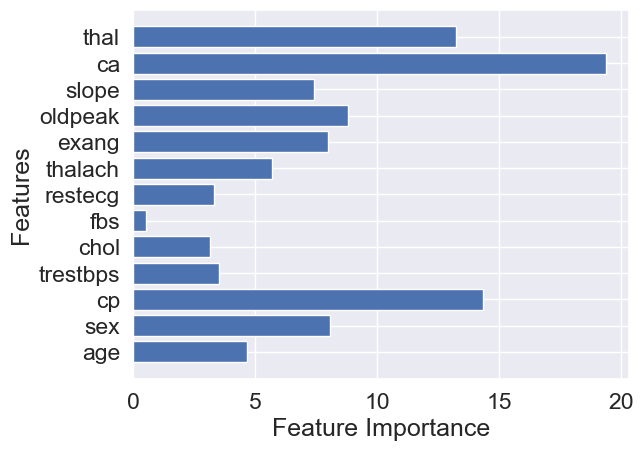

In [114]:
from catboost import Pool, CatBoostClassifier, cv
import matplotlib.pyplot as plt

feature_importances = cat_model.get_feature_importance()
plt.barh(X.columns, feature_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.show()

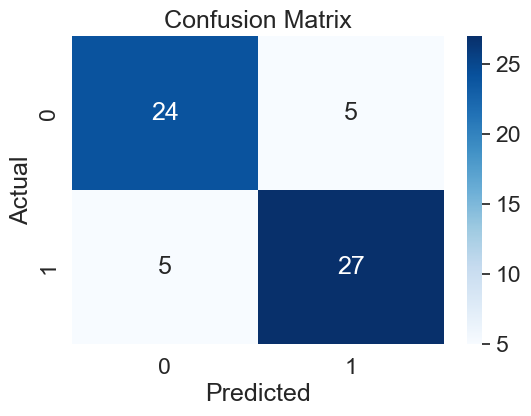

In [118]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

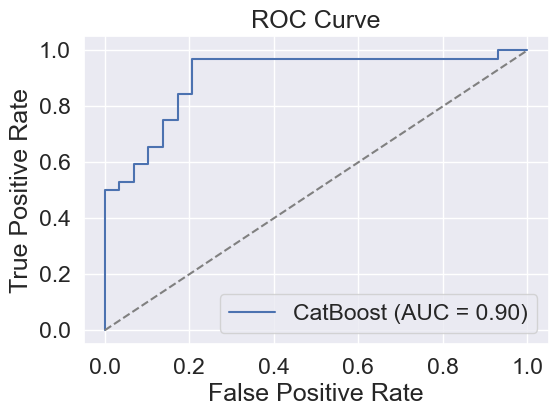

AUC Score: 0.904094827586207


In [119]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = cat_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label='CatBoost (AUC = %0.2f)' % roc_auc)
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

print("AUC Score:", roc_auc)


The CatBoost Classifier provides a strong baseline model for heart disease prediction:

It balances both accuracy and recall very well.

The model is reliable for practical use, especially in identifying high-risk patients.

## Conclusion:
> After experimenting with multiple machine learning algorithms like Logistic Regression, Random Forest, Decision Tree, K-Nearest Neighbors (KNN), XGBoost, and CatBoost, we evaluated each model based on accuracy, precision, recall, and AUC (Area Under the Curve) scores.

Logistic Regression emerged as the best-performing model with an accuracy of 88% and AUC of 90%, making it highly reliable for healthcare prediction tasks such as heart disease diagnosis.

This model was chosen for deployment because:

It is lightweight and fast, ensuring quick response times.

Easy to interpret, which is crucial in medical decision-making.

Performs well with limited data and avoids overfitting compared to more complex models like CatBoost or XGBoost.

Easy to deploy on platforms like Streamlit, Streamlit Cloud, or Hugging Face Spaces.


The final deployment is done using Streamlit, where users can input patient details such as age, cholesterol levels, blood pressure, chest pain type, etc., and receive real-time predictions on whether the patient is at risk of heart disease.

This project demonstrates the complete machine learning workflow:

1. Data preprocessing and cleaning.


2. Model training and evaluation.


3. Saving the best model using pickle.


4. Creating a Streamlit web application for end-user interaction.


## Saving and Loading our Model

In [127]:
import pickle
pickle.dump(gs_log_reg, open('logistic_regression.pkl', 'wb'))

In [128]:
import pickle
modal_load = pickle.load(open('logistic_regression.pkl', 'rb'));

In [129]:
y_pred5 = modal_load.predict(X_test)
precision_score(y_pred5, y_test)

0.90625

In [133]:
modal_load.score(X_test, y_test)

0.8852459016393442